# Лабораторная работа 8. Кластеризация: центроиды (медоиды) звёздных кластеров

Кластер — это группа точек (звёзд), которые образуют “сгусток” на карте. В этой работе кластер задан геометрически: все точки кластера лежат внутри некоторого круга радиуса R.

R = 3  это “масштаб близости”: точки одного кластера расположены компактно (в пределах 3 условных единиц от центра своего круга).

In [1]:
import numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [5]:
rng = np.random.default_rng(146)


R = 3
n_per_cluster = 300
centers = np.array([
    [-8, -2],
    [ 0, 7],
    [ 9, 1],
])


points = []
true_cluster = []


for k, c in enumerate(centers):
    # равномерно по площади круга: радиус = sqrt(u)*R, угол = 2*pi*v
    u = rng.random(n_per_cluster)
    v = rng.random(n_per_cluster)
    r = np.sqrt(u) * R
    theta = 2*np.pi*v
    x = c[0] + r*np.cos(theta)
    y = c[1] + r*np.sin(theta)
    pts = np.c_[x, y]
    points.append(pts)
    true_cluster.extend([k]*n_per_cluster)


X = np.vstack(points)
true_cluster = np.array(true_cluster)


df = pd.DataFrame(X, columns=["x", "y"])
df.head()

,x,y
0,-7.973014,0.683991
1,-8.961858,-0.423219
2,-7.562566,-3.906071
3,-9.726209,-2.273554
4,-5.282847,-2.870077


Кластеризация: как “разбить” точки на 3 кластера

In [6]:
kmeans = KMeans(n_clusters=3, random_state=146, n_init="auto")
labels = kmeans.fit_predict(X)


df["cluster"] = labels
df["cluster"].value_counts().sort_index()

cluster
0    300
1    300
2    300
Name: count, dtype: int64

Как найти центроид (медоид)

In [7]:
def medoid_of_cluster(points_2d: np.ndarray) -> np.ndarray:
    D = pairwise_distances(points_2d, metric="euclidean")
    sums = D.sum(axis=1)
    idx = np.argmin(sums)
    return points_2d[idx]


medoids = []
for k in sorted(df["cluster"].unique()):
    pts = df.loc[df["cluster"] == k, ["x", "y"]].to_numpy()
    m = medoid_of_cluster(pts)
    medoids.append(m)


medoids = np.array(medoids)
medoids

array([[-8.92621177e-04,  7.17573501e+00],
       [ 9.37490752e+00,  1.14254278e+00],
       [-7.97487457e+00, -2.08640921e+00]])

In [9]:
for i, (mx, my) in enumerate(medoids, start=1):
    print(f"Кластер {i}: центроид (медоид) = ({mx:.3f}, {my:.3f})")

Кластер 1: центроид (медоид) = (-0.001, 7.176)
Кластер 2: центроид (медоид) = (9.375, 1.143)
Кластер 3: центроид (медоид) = (-7.975, -2.086)


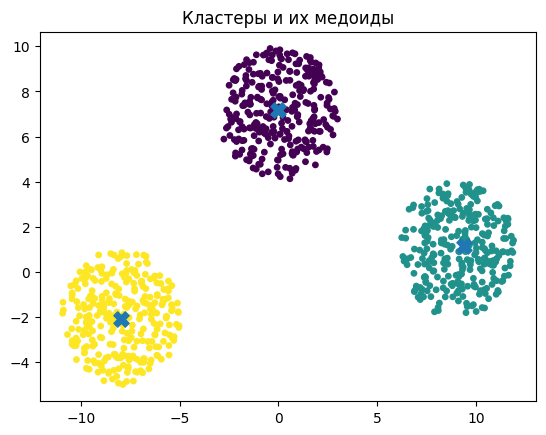

In [10]:
import matplotlib.pyplot as plt


plt.figure()
plt.scatter(df["x"], df["y"], c=df["cluster"], s=15)
plt.scatter(medoids[:,0], medoids[:,1], marker="X", s=120)
plt.title("Кластеры и их медоиды")
plt.show()